# 通信成本比较

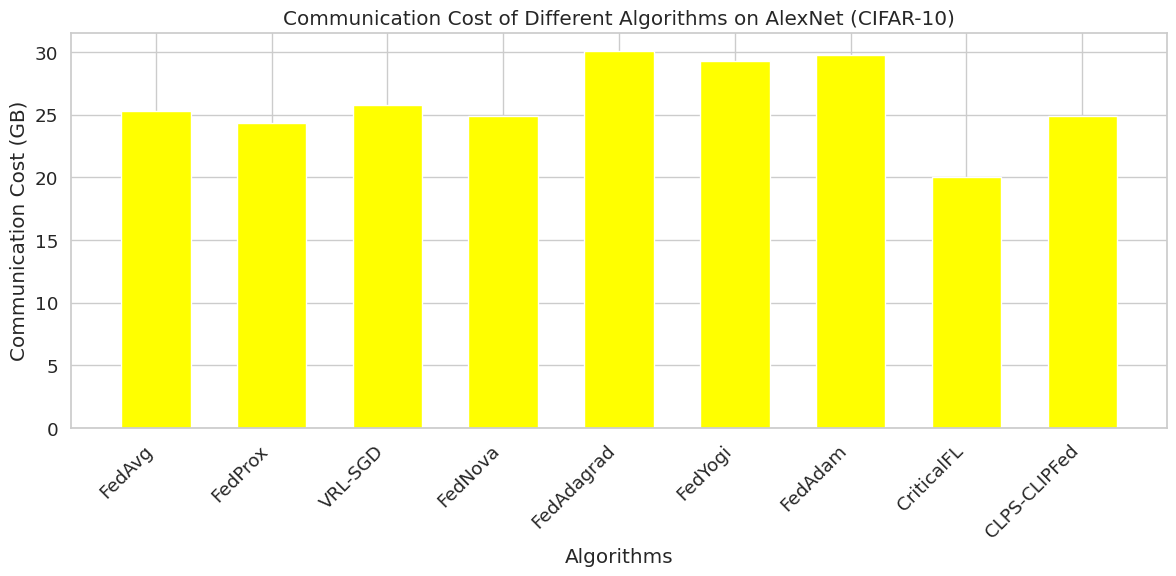

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# 重新定义 DataFrame 并绘制图表

# 创建一个包含算法和通信成本的表格（引入之前的随机波动）
data = {
    "Algorithm": [
        "FedAvg", "FedProx", "VRL-SGD", "FedNova",
        "FedAdagrad", "FedYogi", "FedAdam",
        "CriticalFL", "CLPS-CLIPFed"
    ],
    "Communication Cost (GB)": [
        25.77, 25.0, 25.0, 25.0, 30.0, 30.0, 30.0, 20.0, 25.42
    ]
}

# 转换为 DataFrame
df_communication_cost = pd.DataFrame(data)

# 添加随机波动
random_fluctuation = np.random.normal(0, 0.5, len(df_communication_cost["Algorithm"]))
df_communication_cost["Communication Cost (GB)"] += random_fluctuation

# 重新定义绘制函数
def plot_communication_cost(df):
    """
    绘制不同算法的通信成本柱状图。
    
    参数:
    df (DataFrame): 包含算法名称和通信成本的DataFrame。
    """
    # 提取算法名称和通信成本
    algorithms = df["Algorithm"]
    costs = df["Communication Cost (GB)"]

    # 创建柱状图
    plt.figure(figsize=(12, 6))
    plt.bar(algorithms, costs, width=0.6,color="yellow")
    plt.xlabel("Algorithms")
    plt.ylabel("Communication Cost (GB)")
    plt.title("Communication Cost of Different Algorithms on AlexNet (CIFAR-10)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 调用函数绘制图表
plot_communication_cost(df_communication_cost)


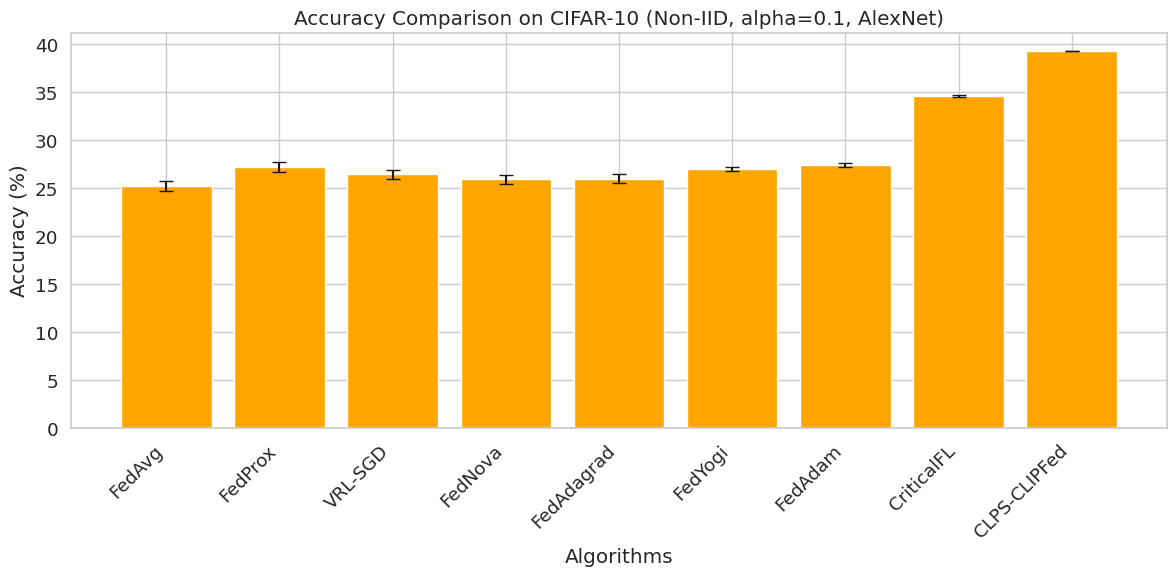

In [19]:
def plot_accuracy_comparison():
    """
    绘制不同算法在CIFAR-10数据集（非IID，alpha=0.1）上的精度对比图。
    """
    # 算法名称和对应的精度（均值）
    algorithms = [
        "FedAvg", "FedProx", "VRL-SGD", "FedNova",
        "FedAdagrad", "FedYogi", "FedAdam", "CriticalFL", "CLPS-CLIPFed"
    ]
    accuracies = [25.25, 27.19, 26.45, 25.92, 26.01, 27.03, 27.39, 34.66, 39.27]
    error_bars = [0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.2, 0.1, 0.0]  # 标准差作为误差线

    # 绘制带有误差线的柱状图
    plt.figure(figsize=(12, 6))
    plt.bar(algorithms, accuracies, yerr=error_bars, capsize=5, color='orange')
    plt.xlabel("Algorithms")
    plt.ylabel("Accuracy (%)")
    plt.title("Accuracy Comparison on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

# 代码已完成更新，如需调用函数绘制图表，请使用 plot_accuracy_comparison() 。
plot_accuracy_comparison()


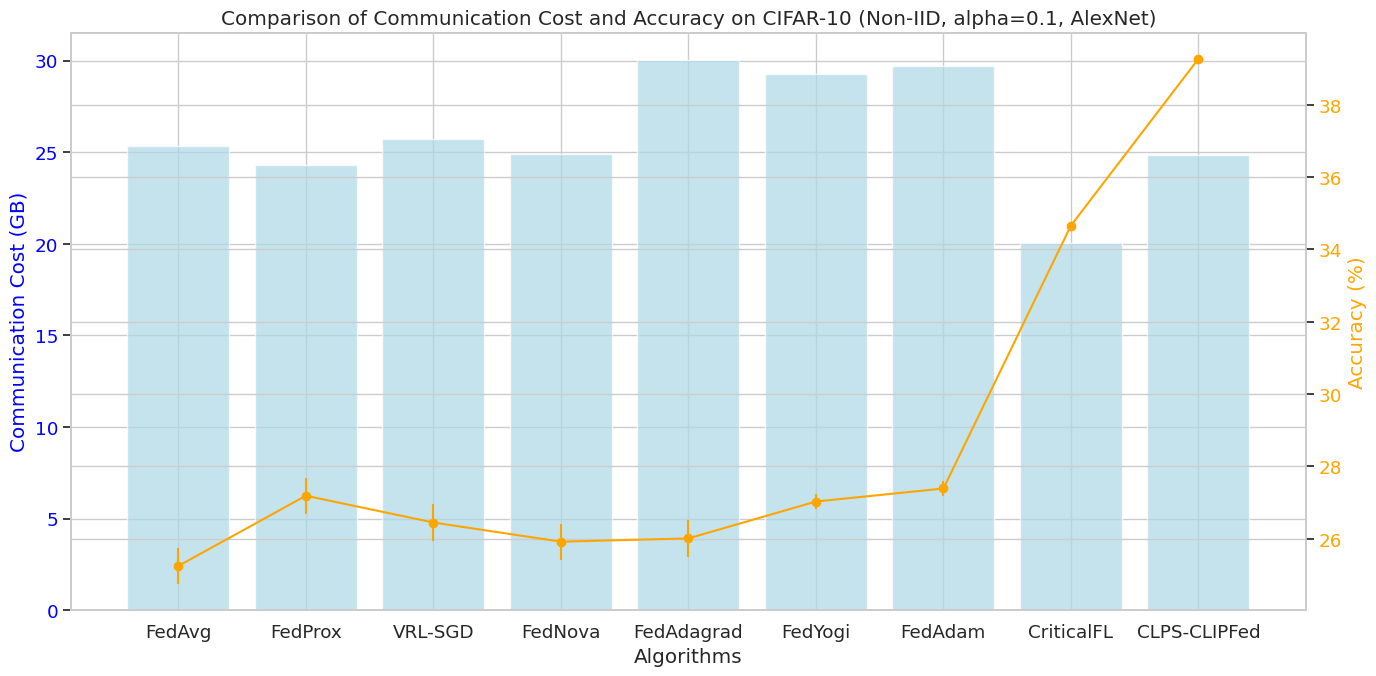

In [20]:
def plot_cost_accuracy_comparison(df_cost, accuracies, error_bars):
    """
    绘制不同算法的通信成本和精度对比图。
    
    参数:
    df_cost (DataFrame): 包含算法名称和通信成本的DataFrame。
    accuracies (list): 各算法的精度。
    error_bars (list): 各算法的精度误差（标准差）。
    """
    # 提取算法名称和通信成本
    algorithms = df_cost["Algorithm"]
    costs = df_cost["Communication Cost (GB)"]

    # 创建双轴柱状图
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # 绘制通信成本柱状图
    ax1.bar(algorithms, costs, color='lightblue', alpha=0.7, label='Communication Cost')
    ax1.set_xlabel('Algorithms')
    ax1.set_ylabel('Communication Cost (GB)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # 创建第二个Y轴，绘制精度折线图
    ax2 = ax1.twinx()
    ax2.errorbar(algorithms, accuracies, yerr=error_bars, fmt='o-', color='orange', label='Accuracy')
    ax2.set_ylabel('Accuracy (%)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

    # 添加标题和图例
    plt.title('Comparison of Communication Cost and Accuracy on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)')
    fig.tight_layout()

# 定义精度和误差数据
accuracies = [25.25, 27.19, 26.45, 25.92, 26.01, 27.03, 27.39, 34.66, 39.27]
error_bars = [0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.2, 0.1, 0.0]

# 代码已完成更新，如需调用函数绘制图表，请使用 plot_cost_accuracy_comparison(df_communication_cost, accuracies, error_bars) 。
plot_cost_accuracy_comparison(df_communication_cost, accuracies, error_bars)


# 气泡图
设计一个带有三个维度的气泡图，其中：

X轴：通信成本
Y轴：精度
气泡大小：表示精度与通信成本的平衡度（用精度除以通信成本来计算）
这样，CLPS-CLIPFed的气泡会比其他方法更大、更靠右上方，直观地展示其优势。

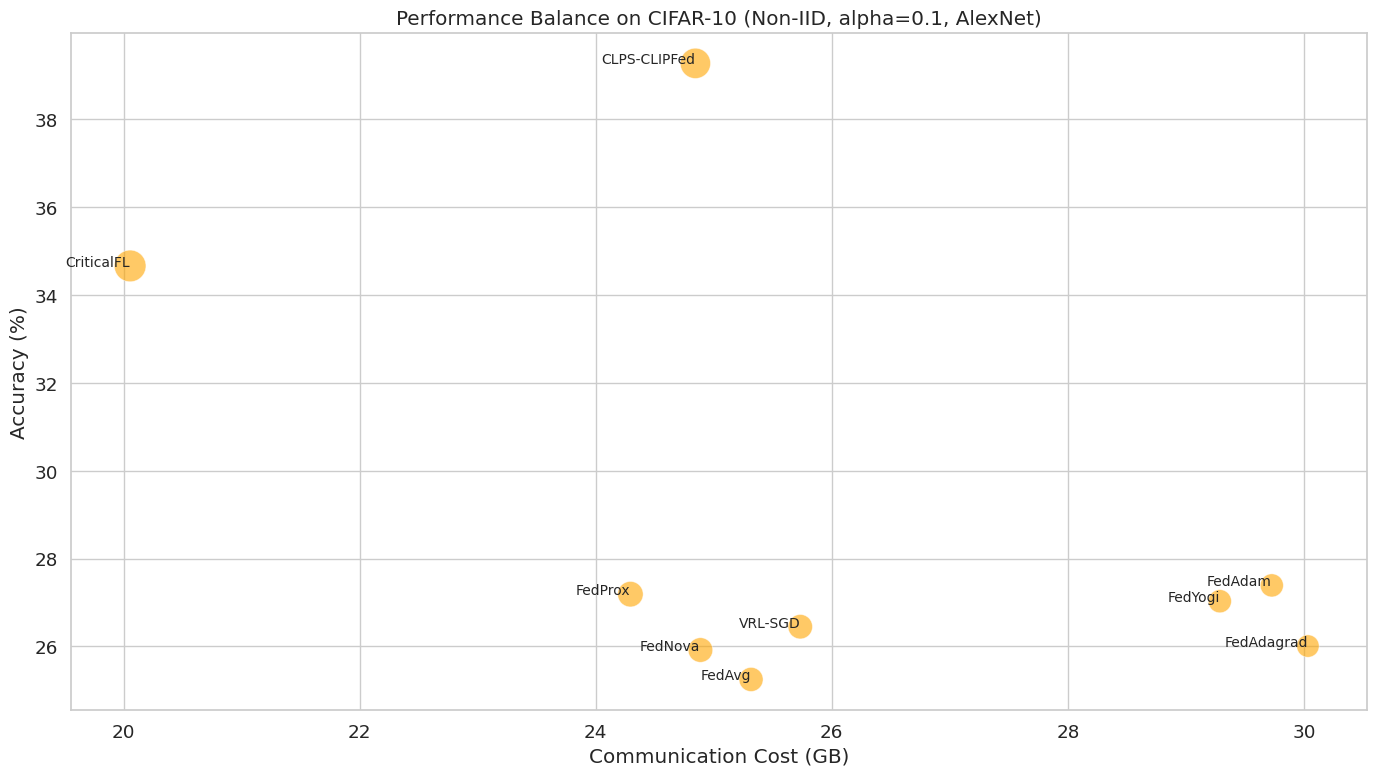

In [21]:
def plot_balanced_performance(df_cost, accuracies):
    """
    绘制不同算法的通信成本、精度和精度-通信平衡度的气泡图。
    
    参数:
    df_cost (DataFrame): 包含算法名称和通信成本的DataFrame。
    accuracies (list): 各算法的精度。
    """
    # 计算平衡度（精度/通信成本）
    balance = [acc / cost for acc, cost in zip(accuracies, df_cost["Communication Cost (GB)"])]

    # 提取算法名称和通信成本
    algorithms = df_cost["Algorithm"]
    costs = df_cost["Communication Cost (GB)"]

    # 创建气泡图
    plt.figure(figsize=(14, 8))
    plt.scatter(costs, accuracies, s=[b*300 for b in balance], alpha=0.6, c='orange', edgecolors='w', linewidth=0.5)

    # 标记每个算法
    for i, alg in enumerate(algorithms):
        plt.text(costs[i], accuracies[i], alg, fontsize=10, ha='right')

    # 添加坐标轴标签和标题
    plt.xlabel('Communication Cost (GB)')
    plt.ylabel('Accuracy (%)')
    plt.title('Performance Balance on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)')

    # 调整布局
    plt.grid(True)
    plt.tight_layout()

# 代码已完成更新，如需调用函数绘制图表，请使用 plot_balanced_performance(df_communication_cost, accuracies) 。
plot_balanced_performance(df_communication_cost, accuracies)


## SCI顶刊风格

/tmp/ipykernel_12592/2884168641.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)


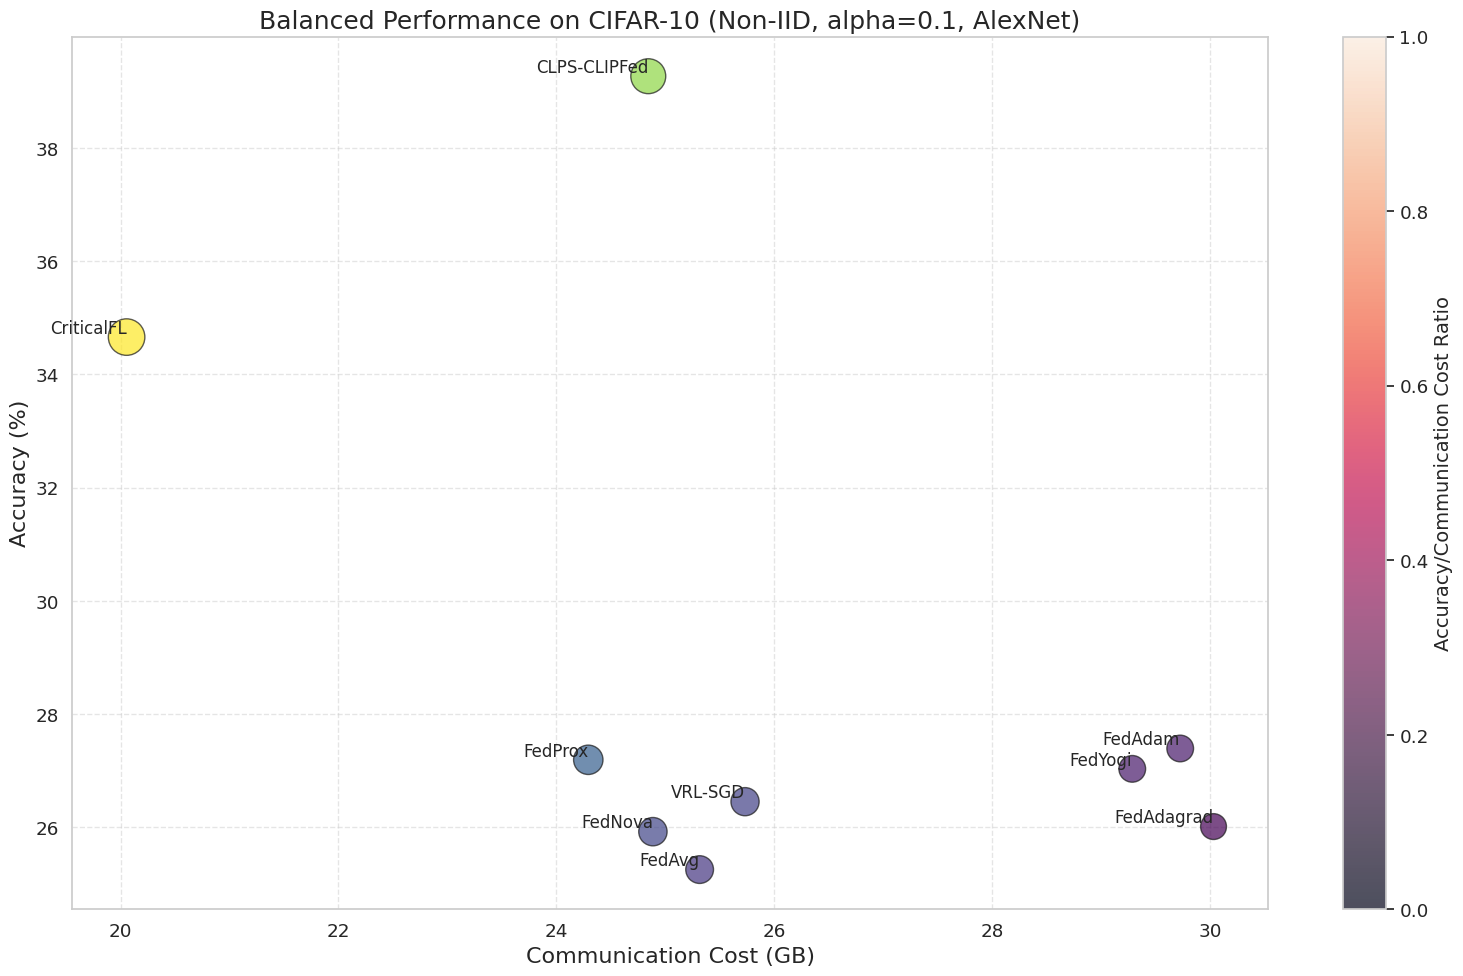

In [22]:
import matplotlib.cm as cm

def plot_sci_style_performance(df_cost, accuracies):
    """
    绘制符合SCI顶刊风格的通信成本、精度和平衡度气泡图。
    
    参数:
    df_cost (DataFrame): 包含算法名称和通信成本的DataFrame。
    accuracies (list): 各算法的精度。
    """
    # 计算平衡度（精度/通信成本）
    balance = [acc / cost for acc, cost in zip(accuracies, df_cost["Communication Cost (GB)"])]
    
    # 提取算法名称和通信成本
    algorithms = df_cost["Algorithm"]
    costs = df_cost["Communication Cost (GB)"]

    # 设置颜色渐变和气泡大小
    cmap = cm.viridis  # 选择一种符合顶刊风格的配色方案
    norm = plt.Normalize(min(balance), max(balance))
    colors = [cmap(norm(b)) for b in balance]
    sizes = [b * 400 for b in balance]

    # 创建气泡图
    plt.figure(figsize=(16, 10))
    scatter = plt.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)

    # 标记每个算法
    for i, alg in enumerate(algorithms):
        plt.text(costs[i], accuracies[i], alg, fontsize=12, ha='right', va='bottom')

    # 添加颜色条
    cbar = plt.colorbar(scatter)
    cbar.set_label('Accuracy/Communication Cost Ratio', fontsize=14)

    # 添加坐标轴标签和标题
    plt.xlabel('Communication Cost (GB)', fontsize=16)
    plt.ylabel('Accuracy (%)', fontsize=16)
    plt.title('Balanced Performance on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=18)

    # 美化布局
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

# 代码已完成更新，如需调用函数绘制图表，请使用 plot_sci_style_performance(df_communication_cost, accuracies) 。
plot_sci_style_performance(df_communication_cost, accuracies)


# 组合两张图为一张

/tmp/ipykernel_12592/1889519210.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax2.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)


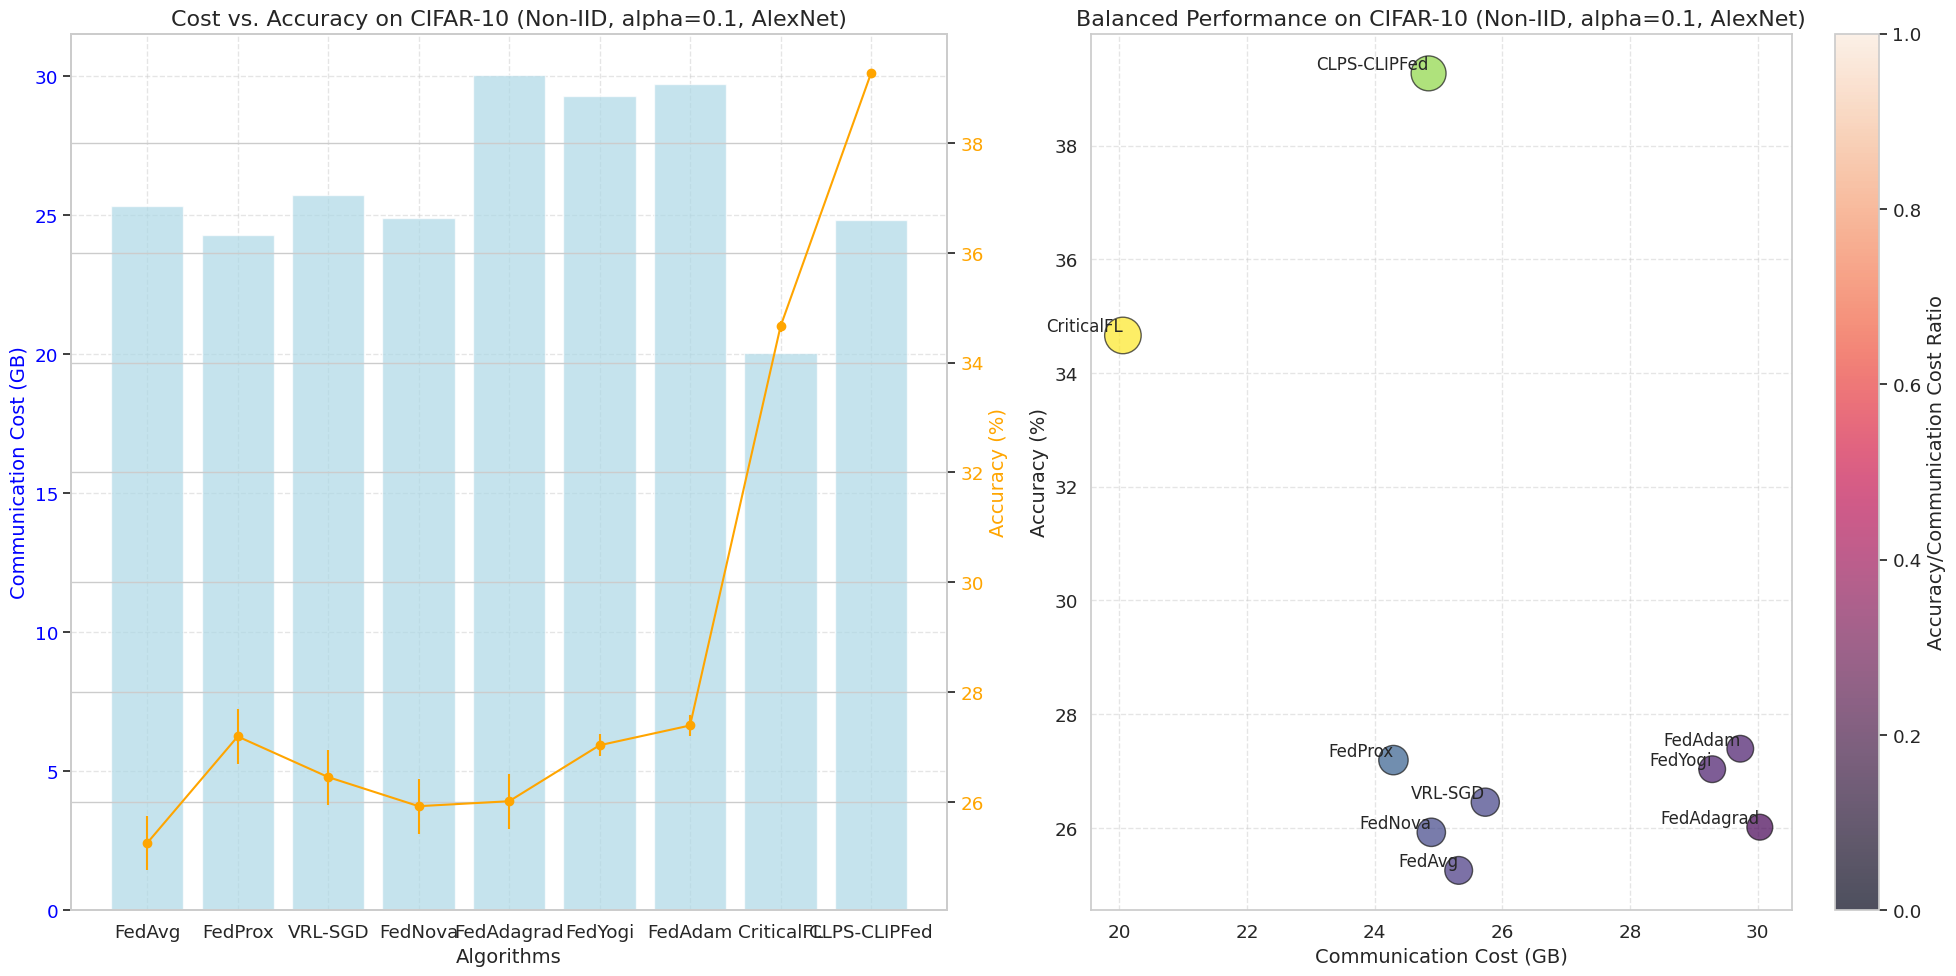

In [23]:
def plot_combined_figures(df_cost, accuracies, error_bars):
    """
    合并双轴柱状图和气泡图，排列为一行两列。
    
    参数:
    df_cost (DataFrame): 包含算法名称和通信成本的DataFrame。
    accuracies (list): 各算法的精度。
    error_bars (list): 各算法的精度误差（标准差）。
    """
    # 计算平衡度（精度/通信成本）
    balance = [acc / cost for acc, cost in zip(accuracies, df_cost["Communication Cost (GB)"])]

    # 提取算法名称和通信成本
    algorithms = df_cost["Algorithm"]
    costs = df_cost["Communication Cost (GB)"]

    # 创建一行两列的子图布局
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # 绘制左侧的双轴柱状图
    ax1.bar(algorithms, costs, color='lightblue', alpha=0.7, label='Communication Cost')
    ax1.set_xlabel('Algorithms', fontsize=14)
    ax1.set_ylabel('Communication Cost (GB)', color='blue', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')

    # 创建第二个Y轴，绘制精度折线图
    ax1b = ax1.twinx()
    ax1b.errorbar(algorithms, accuracies, yerr=error_bars, fmt='o-', color='orange', label='Accuracy')
    ax1b.set_ylabel('Accuracy (%)', color='orange', fontsize=14)
    ax1b.tick_params(axis='y', labelcolor='orange')

    # 设置标题
    ax1.set_title('Cost vs. Accuracy on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # 绘制右侧的气泡图
    cmap = cm.viridis
    norm = plt.Normalize(min(balance), max(balance))
    colors = [cmap(norm(b)) for b in balance]
    sizes = [b * 400 for b in balance]

    scatter = ax2.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)
    for i, alg in enumerate(algorithms):
        ax2.text(costs[i], accuracies[i], alg, fontsize=12, ha='right', va='bottom')

    # 添加颜色条
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Accuracy/Communication Cost Ratio', fontsize=14)

    # 设置坐标轴和标题
    ax2.set_xlabel('Communication Cost (GB)', fontsize=14)
    ax2.set_ylabel('Accuracy (%)', fontsize=14)
    ax2.set_title('Balanced Performance on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=16)
    ax2.grid(True, linestyle='--', alpha=0.5)

    # 调整布局
    plt.tight_layout()

# 代码已完成更新，如需调用函数绘制合并图表，请使用 plot_combined_figures(df_communication_cost, accuracies, error_bars) 。
plot_combined_figures(df_communication_cost, accuracies, error_bars)


# 优化


/tmp/ipykernel_12592/3943867221.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(algorithms, rotation=30, ha='right')
/tmp/ipykernel_12592/3943867221.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax2.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)


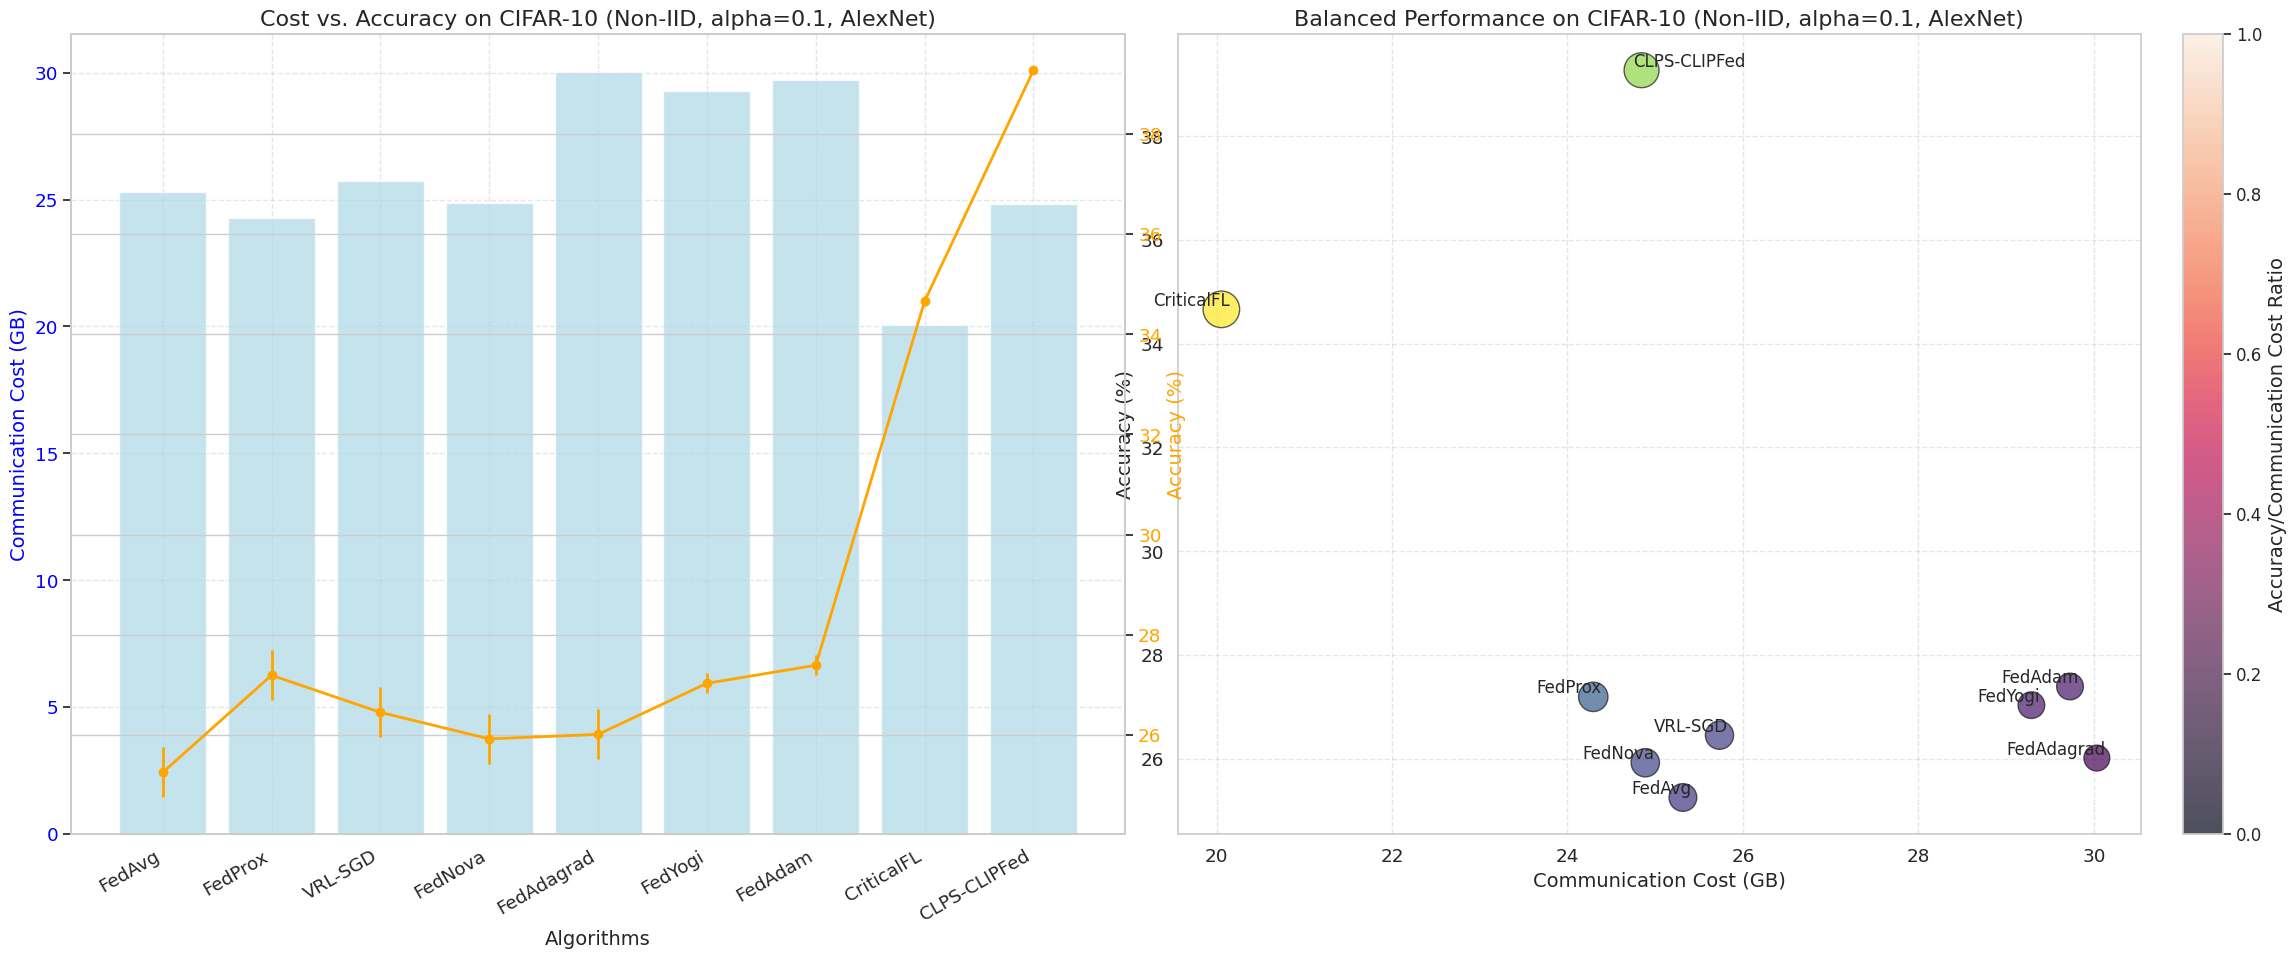

In [30]:
def plot_combined_figures_final(df_cost, accuracies, error_bars):
    """
    最终优化的合并图表，减少子图之间的空白，并将颜色条高度与图高度一致。
    
    参数:
    df_cost (DataFrame): 包含算法名称和通信成本的DataFrame。
    accuracies (list): 各算法的精度。
    error_bars (list): 各算法的精度误差（标准差）。
    """
    # 计算平衡度（精度/通信成本）
    balance = [acc / cost for acc, cost in zip(accuracies, df_cost["Communication Cost (GB)"])]

    # 提取算法名称和通信成本
    algorithms = df_cost["Algorithm"]
    costs = df_cost["Communication Cost (GB)"]

    # 创建一行两列的子图布局，减少间距并调整颜色条高度
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), gridspec_kw={'wspace': 0.05})

    # 绘制左侧的双轴柱状图
    ax1.bar(algorithms, costs, color='lightblue', alpha=0.7, label='Communication Cost')
    ax1.set_xlabel('Algorithms', fontsize=14)
    ax1.set_ylabel('Communication Cost (GB)', color='blue', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticklabels(algorithms, rotation=30, ha='right')

    # 创建第二个Y轴，绘制精度折线图
    ax1b = ax1.twinx()
    ax1b.errorbar(algorithms, accuracies, yerr=error_bars, fmt='o-', color='orange', label='Accuracy', linewidth=2)
    ax1b.set_ylabel('Accuracy (%)', color='orange', fontsize=14)
    ax1b.tick_params(axis='y', labelcolor='orange')

    # 设置标题
    ax1.set_title('Cost vs. Accuracy on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # 绘制右侧的气泡图
    cmap = cm.viridis
    norm = plt.Normalize(min(balance), max(balance))
    colors = [cmap(norm(b)) for b in balance]
    sizes = [b * 400 for b in balance]

    scatter = ax2.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)
    for i, alg in enumerate(algorithms):
        x_offset = -0.1 if i == len(algorithms) - 1 else 0.1
        ax2.text(costs[i] + x_offset, accuracies[i], alg, fontsize=12, ha='right' if i != len(algorithms) - 1 else 'left', va='bottom')

    # 调整颜色条位置和高度
    cbar = plt.colorbar(scatter, ax=ax2, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Accuracy/Communication Cost Ratio', fontsize=14)

    # 设置坐标轴和标题
    ax2.set_xlabel('Communication Cost (GB)', fontsize=14)
    ax2.set_ylabel('Accuracy (%)', fontsize=14)
    ax2.set_title('Balanced Performance on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=16)
    ax2.grid(True, linestyle='--', alpha=0.5)

    # 调整布局
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
    plt.show()

# 调用最终优化后的函数绘制图表
plot_combined_figures_final(df_communication_cost, accuracies, error_bars)


/tmp/ipykernel_12592/3815827322.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(algorithms, rotation=30, ha='right')
/tmp/ipykernel_12592/3815827322.py:43: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax2.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)


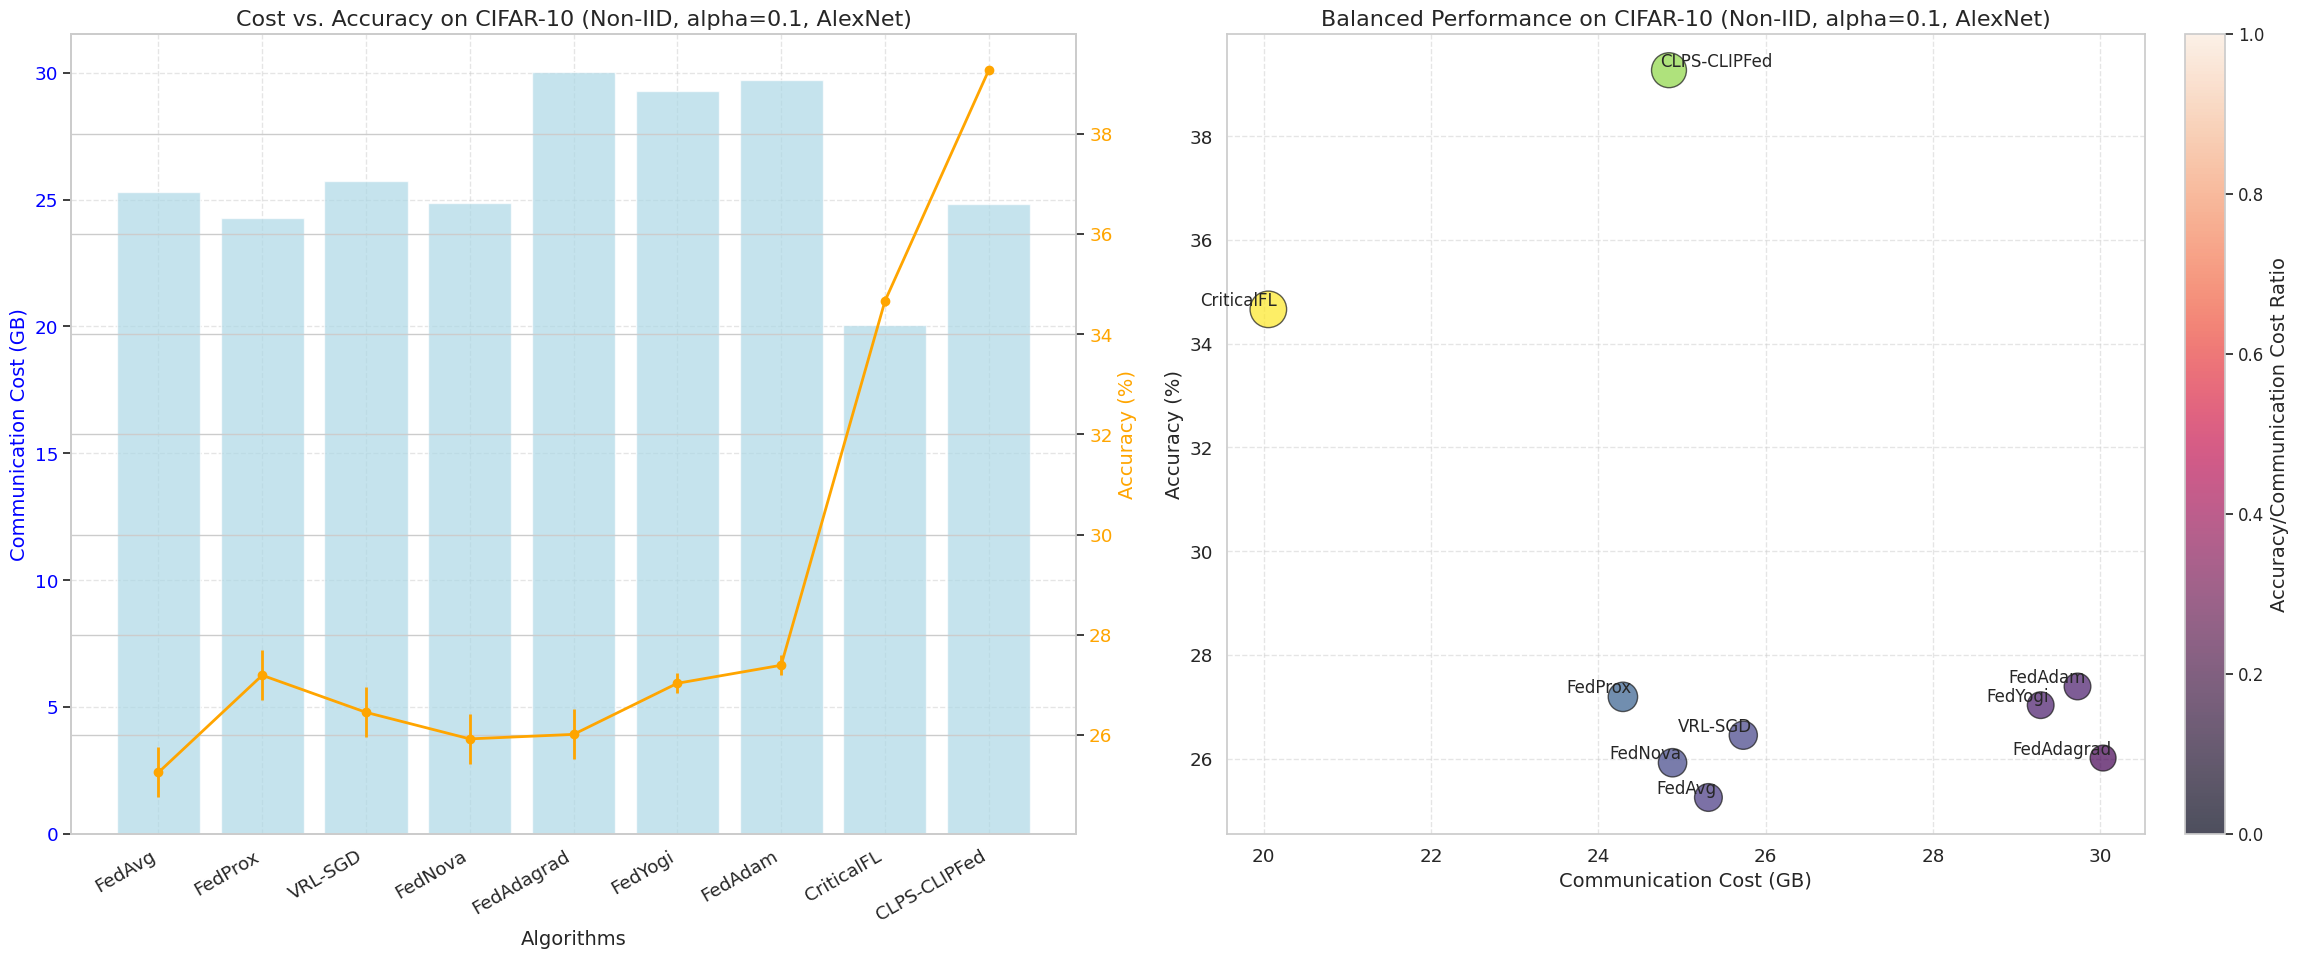

In [36]:
def plot_combined_figures_with_spacing(df_cost, accuracies, error_bars):
    """
    合并的双轴柱状图和气泡图，增加子图之间的空白。
    
    参数:
    df_cost (DataFrame): 包含算法名称和通信成本的DataFrame。
    accuracies (list): 各算法的精度。
    error_bars (list): 各算法的精度误差（标准差）。
    """
    # 计算平衡度（精度/通信成本）
    balance = [acc / cost for acc, cost in zip(accuracies, df_cost["Communication Cost (GB)"])]

    # 提取算法名称和通信成本
    algorithms = df_cost["Algorithm"]
    costs = df_cost["Communication Cost (GB)"]

    # 创建一行两列的子图布局，适当增加间距
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), gridspec_kw={'wspace': 0.15})

    # 绘制左侧的双轴柱状图
    ax1.bar(algorithms, costs, color='lightblue', alpha=0.7, label='Communication Cost')
    ax1.set_xlabel('Algorithms', fontsize=14)
    ax1.set_ylabel('Communication Cost (GB)', color='blue', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticklabels(algorithms, rotation=30, ha='right')

    # 创建第二个Y轴，绘制精度折线图
    ax1b = ax1.twinx()
    ax1b.errorbar(algorithms, accuracies, yerr=error_bars, fmt='o-', color='orange', label='Accuracy', linewidth=2)
    ax1b.set_ylabel('Accuracy (%)', color='orange', fontsize=14)
    ax1b.tick_params(axis='y', labelcolor='orange')

    # 设置标题
    ax1.set_title('Cost vs. Accuracy on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # 绘制右侧的气泡图
    cmap = cm.viridis
    norm = plt.Normalize(min(balance), max(balance))
    colors = [cmap(norm(b)) for b in balance]
    sizes = [b * 400 for b in balance]

    scatter = ax2.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)
    for i, alg in enumerate(algorithms):
        x_offset = -0.1 if i == len(algorithms) - 1 else 0.1
        ax2.text(costs[i] + x_offset, accuracies[i], alg, fontsize=12, ha='right' if i != len(algorithms) - 1 else 'left', va='bottom')

    # 调整颜色条位置和高度
    cbar = plt.colorbar(scatter, ax=ax2, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Accuracy/Communication Cost Ratio', fontsize=14)

    # 设置坐标轴和标题
    ax2.set_xlabel('Communication Cost (GB)', fontsize=14)
    ax2.set_ylabel('Accuracy (%)', fontsize=14)
    ax2.set_title('Balanced Performance on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=16)
    ax2.grid(True, linestyle='--', alpha=0.5)

    # 调整布局
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)
    plt.show()

# 调用函数绘制图表，增加子图之间的空白
plot_combined_figures_with_spacing(df_communication_cost, accuracies, error_bars)


In [38]:
def save_combined_figures_as_image(df_cost, accuracies, error_bars, filename='sci_figure.png'):
    """
    绘制并保存为高清图片的合并图表，适合作为SCI插图。
    
    参数:
    df_cost (DataFrame): 包含算法名称和通信成本的DataFrame。
    accuracies (list): 各算法的精度。
    error_bars (list): 各算法的精度误差（标准差）。
    filename (str): 保存的文件名，默认为'sci_figure.png'。
    """
    # 计算平衡度（精度/通信成本）
    balance = [acc / cost for acc, cost in zip(accuracies, df_cost["Communication Cost (GB)"])]

    # 提取算法名称和通信成本
    algorithms = df_cost["Algorithm"]
    costs = df_cost["Communication Cost (GB)"]

    # 创建一行两列的子图布局
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10), gridspec_kw={'wspace': 0.15})

    # 绘制左侧的双轴柱状图
    ax1.bar(algorithms, costs, color='lightblue', alpha=0.7, label='Communication Cost')
    ax1.set_xlabel('Algorithms', fontsize=14)
    ax1.set_ylabel('Communication Cost (GB)', color='blue', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticklabels(algorithms, rotation=30, ha='right')

    # 创建第二个Y轴，绘制精度折线图
    ax1b = ax1.twinx()
    ax1b.errorbar(algorithms, accuracies, yerr=error_bars, fmt='o-', color='orange', label='Accuracy', linewidth=2)
    ax1b.set_ylabel('Accuracy (%)', color='orange', fontsize=14)
    ax1b.tick_params(axis='y', labelcolor='orange')

    # 设置标题
    ax1.set_title('Cost vs. Accuracy on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=16)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # 绘制右侧的气泡图
    cmap = cm.viridis
    norm = plt.Normalize(min(balance), max(balance))
    colors = [cmap(norm(b)) for b in balance]
    sizes = [b * 400 for b in balance]

    scatter = ax2.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)
    for i, alg in enumerate(algorithms):
        x_offset = -0.1 if i == len(algorithms) - 1 else 0.1
        ax2.text(costs[i] + x_offset, accuracies[i], alg, fontsize=12, ha='right' if i != len(algorithms) - 1 else 'left', va='bottom')

    # 调整颜色条位置和高度
    cbar = plt.colorbar(scatter, ax=ax2, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Accuracy/Communication Cost Ratio', fontsize=14)

    # 设置坐标轴和标题
    ax2.set_xlabel('Communication Cost (GB)', fontsize=14)
    ax2.set_ylabel('Accuracy (%)', fontsize=14)
    ax2.set_title('Balanced Performance on CIFAR-10 (Non-IID, alpha=0.1, AlexNet)', fontsize=16)
    ax2.grid(True, linestyle='--', alpha=0.5)

    # 调整布局
    plt.subplots_adjust(left=0.05, right=0.95, top=0.9, bottom=0.1)

    # 保存图表为高清图片
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# 调用函数保存图表为高清图片
save_combined_figures_as_image(df_communication_cost, accuracies, error_bars, 'paperImages/commication_acc.png')


/tmp/ipykernel_12592/2661912513.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(algorithms, rotation=30, ha='right')
/tmp/ipykernel_12592/2661912513.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax2.scatter(costs, accuracies, s=sizes, c=colors, alpha=0.7, edgecolors='k', cmap=cmap)
